In [3]:
!unzip jyxstxtqj.zip

Archive:  jyxstxtqj.zip
  inflating: 射雕英雄传.txt     
  inflating: 神雕侠侣.txt        
  inflating: 书剑恩仇录.txt     
  inflating: 天龙八部.txt        
  inflating: 侠客行.txt           
  inflating: 笑傲江湖.txt        
  inflating: 雪山飞狐.txt        
  inflating: 倚天屠龙记.txt     
  inflating: 鸳鸯刀.txt           
  inflating: 越女剑.txt           
  inflating: inf.txt                 
  inflating: 白马啸西风.txt     
  inflating: 碧血剑.txt           
  inflating: 飞狐外传.txt        
  inflating: 连城诀.txt           
  inflating: 鹿鼎记.txt           
  inflating: 绿色资源网.url     
  inflating: 三十三剑客图.txt  


In [2]:
!pip install jieba

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 1.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314477 sha256=625fc9484e6450d246a9b375ee70952987964688e021d95660b6f241be079ae3
  Stored in directory: /root/.cache/pip/wheels/1e/38/87/a0f2d9504eee018eea490f7821cb9142b6a9304c318dba4fdd
Successfully built jieba


In [4]:
!pip install scikit-learn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.4 MB/s eta 0:00:00a 0:00:01


In [6]:
!pip install gensim

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.5 MB/s eta 0:00:00


In [26]:
!pip install gensim

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [ ]:
import os
import math
import jieba
import logging
import numpy as np
import re  # 引入正则表达式模块
from collections import Counter


def DFS_file_search(dict_name):
    # 初始化一个栈和一个列表用于存储结果
    stack = []  # 用于存储待访问的文件夹
    result_txt = []  # 用于存储找到的文件路径
    stack.append(dict_name)  # 将初始文件夹路径放入栈中
    # 不断循环直到栈为空，即所有文件夹路径都已放入栈中
    while len(stack) != 0:
        # 取出栈顶元素
        temp_name = stack.pop()
        try:
            # 获取当前文件夹下的所有文件和文件夹名字
            temp_name2 = os.listdir(temp_name)
            for eve in temp_name2:
                # 将文件夹下的子文件夹或文件路径添加到栈中
                stack.append(temp_name + "/" + eve)
        except NotADirectoryError:
            # 如果是文件而不是文件夹，则将文件路径添加到结果列表中
            result_txt.append(temp_name)
    return result_txt

# 调用 DFS_file_search 函数，获取所有小说文件的路径列表
path_list = DFS_file_search(r'Untitle')

# 初始化一个空列表，用于存储语料库中的文本
corpus = []

# 遍历每个小说文件的路径
for path in path_list:
    with open(path, "r" ,encoding='gbk',errors="ignore") as file:
        # 读取文件的每一行，去掉换行符和制表符，去掉前三行
        text = [line.strip("\n").replace("\u3000","").replace("\t","") for line in file][3:]
        # 将处理后的文本内容加入语料库列表中
        corpus += text

# 初始化正则表达式
regex_str = ".*?([^\u4E00-\u9FA5]).*?"  # 匹配非中文字符   
english = u'[a-zA-Z0-9’!"#$%&\'()*+,-./:：;「<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'  # 匹配英文字符/数字/符号
symbol = []  # 初始化符号列表

# 遍历语料库中的每一行文本
for j in range(len(corpus)):
    corpus[j] = re.sub(english,"",corpus[j])  # 去掉文本中的英文字符、数字、符号
    symbol += re.findall(regex_str,corpus[j])  # 超重非中文字符并添加到 symbol 列表中

count_ = Counter(symbol)  # 统计每个非中文字符出现的次数
count_symbol = count_.most_common()  # 按出现次数从高到低排序

# 初始化一个列表，用于存储出现次数小于 200 的噪声符号
noise_symbol = []
# 遍历出现次数统计结果
for eve_tuple in count_symbol:
     if eve_tuple[1] < 200:
         # 将出现次数小于 200 的噪声符号添加到列表中
         noise_symbol.append(eve_tuple[0])

# 初始化一个变量，记录替换的噪声数据点数
noise_number = 0

# 遍历语料库中的每一行文本
for line in corpus:
    # 遍历噪声符号列表
    for noise in noise_symbol:
        # 替换当前行中的噪声符号为空字符串
        line.replace(noise,"")
        # 更新替换的噪声数据点数
        noise_number += 1

print("完成的噪声数据替换点：",noise_number)
print("替换的噪声符号：")

# 遍历噪声符号列表，逐个打印出来
for i in range(len(noise_symbol)):
    print(noise_symbol[i],end = "")
    if i % 50 == 0:
        print()  # 每 50 个符号换行打印

# 将处理后的文本写入文件中
with open("预处理后的文本.txt","w",encoding="utf-8") as f:
    for line in corpus:
        if len(line) > 1:
            print(line,file=f)  # 将每一行非空文本写入文件中

# 打开预处理后的文本.txt，并将文件内容读取到名为 'corpus' 的列表中
with open("预处理后的文本.txt","r",encoding="utf-8") as f:
    corpus = [eve.strip("\n") for eve in f]


In [2]:
import jieba
import re
import warnings
warnings.filterwarnings('ignore')
 
with open("预处理后的文本.txt", 'r',encoding='utf-8')as f: # 读入文本
    lines = []
    for line in f: #分别对每段分词
        temp = jieba.lcut(line)  #结巴分词 精确模式
        words = []
        for i in temp:
            #过滤掉所有的标点符号
            i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
            if len(i) > 0:
                words.append(i)
        if len(words) > 0:
            lines.append(words)
print(lines[0:5])#预览前5行分词结果

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.738 seconds.
Prefix dict has been built successfully.


[['越', '女', '剑'], ['金', '庸'], ['请', '请'], ['两名', '剑士', '各自', '倒转', '剑尖', '右手', '握', '剑柄', '左手', '搭于', '右手', '手背', '躬身行礼'], ['两人', '身子', '尚未', '站', '直', '突然', '间', '白光闪', '动', '跟着', '铮', '的', '一', '声响', '双剑相', '交两人', '各']]


In [3]:
from gensim.models import Word2Vec
# 调用Word2Vec训练 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(lines,vector_size = 20, window = 2 , min_count = 3, epochs=7, negative=10,sg=1)


In [52]:
print("剑的词向量：\n",model.wv.get_vector('剑'))
print("\n和剑相关性最高的前20个词语：")
model.wv.most_similar('剑', topn = 20)# 与孔明最相关的前20个词语

剑的词向量：
 [-0.5306013  -0.1972244   0.4842331   0.9564968  -0.8132512   1.0354681
  0.1090683   0.75586325 -1.2917203  -0.56130964 -0.51360774  0.53759474
 -0.5016152  -1.0257587  -0.04510958 -0.39641207  0.4888996  -1.0842248
 -0.77887625 -1.0185915 ]

和剑相关性最高的前20个词语：


[('棒', 0.9187047481536865),
 ('刀', 0.9157050848007202),
 ('招', 0.9096961617469788),
 ('拂尘', 0.8938692808151245),
 ('拳', 0.8707174062728882),
 ('撩', 0.8653867244720459),
 ('板斧', 0.8622188568115234),
 ('木剑', 0.8612076044082642),
 ('金蛇剑', 0.8512739539146423),
 ('左', 0.8511722087860107),
 ('倚天剑', 0.8507440686225891),
 ('空手', 0.8507047891616821),
 ('快刀', 0.8488537669181824),
 ('枪', 0.8462164402008057),
 ('竹棒', 0.8432989120483398),
 ('铁鞭', 0.841780424118042),
 ('掌', 0.8402955532073975),
 ('第二招', 0.8390119671821594),
 ('第一招', 0.8337708115577698),
 ('斧', 0.8331699371337891)]

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

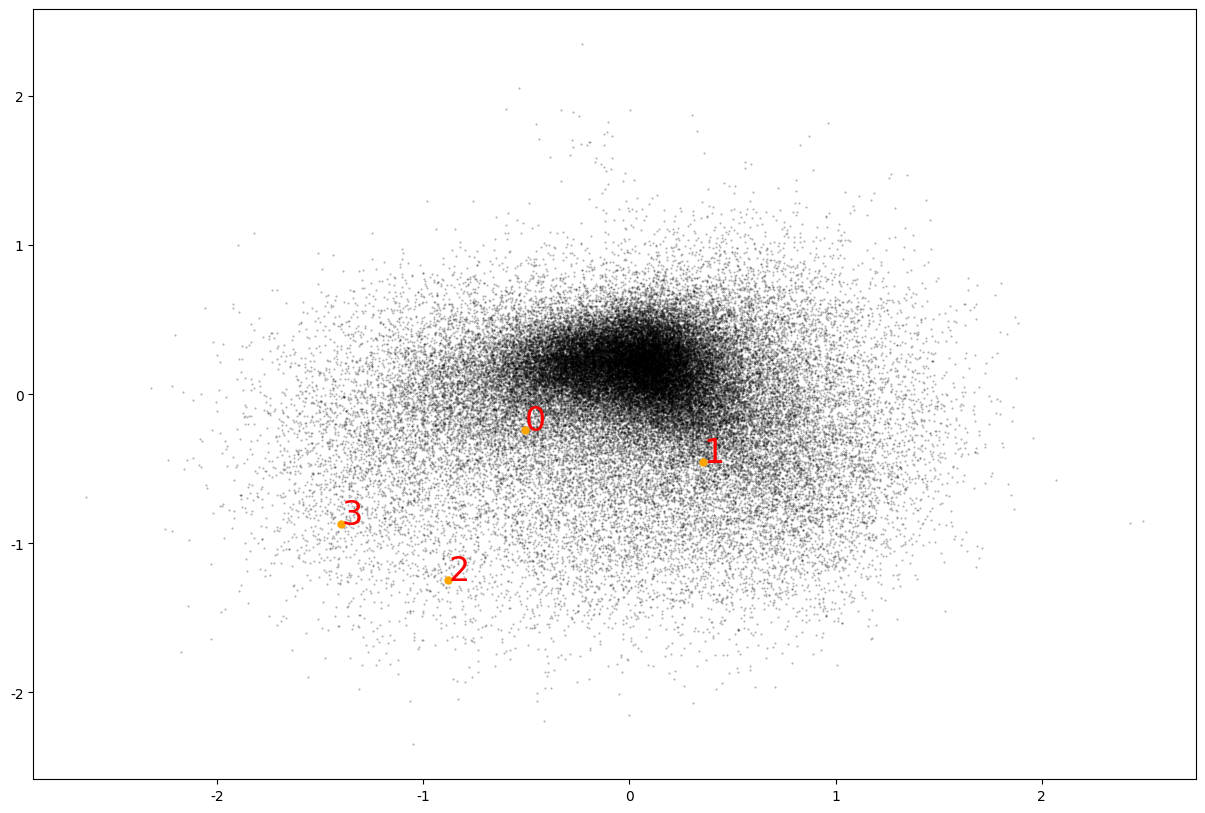

In [46]:
import numpy as np

from pylab import *
from sklearn.decomposition import PCA
# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key):
    rawWordVec.append(model.wv[w]) # 词向量
    word2ind[w] = i # {词语:序号}
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)  # PCA降2维
 
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')
 
 
# 绘制几个特殊单词的向量
words = ['剑', '女', '站', '右手']
 
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1],  words.index(w), alpha = 1, color = 'red',fontsize=24)

In [57]:
# 玄德－孔明＝？－曹操
words = model.wv.most_similar(positive=['杨过', '小龙女'], negative=['欧阳修'])
words

[('周芷若', 0.8605324625968933),
 ('石破天', 0.8492506742477417),
 ('鹿杖客', 0.8388966917991638),
 ('蛛儿', 0.8373003005981445),
 ('梅超风', 0.8357945680618286),
 ('胡斐', 0.8356613516807556),
 ('丁典', 0.8329110145568848),
 ('狄云', 0.8321994543075562),
 ('郭靖', 0.8320910334587097),
 ('岳灵珊', 0.8312885761260986)]

In [69]:
# 曹操－魏＝？－蜀
words = model.wv.most_similar(positive=['杨过', '剑'], negative=['黄蓉'])
words

[('拳', 0.8988319635391235),
 ('招', 0.8886288404464722),
 ('棒', 0.876518726348877),
 ('拂尘', 0.8613254427909851),
 ('刀', 0.8608443737030029),
 ('剑法', 0.860496461391449),
 ('空手', 0.8603854179382324),
 ('快刀', 0.8594430088996887),
 ('掌', 0.8540631532669067),
 ('第二招', 0.8532459735870361)]

In [70]:
print(model.wv.similarity('郭靖', '黄蓉')) 

0.97961634


In [72]:
 print(model.wv.most_similar('英雄'))

[('朋友', 0.9088568687438965), ('恩人', 0.907694399356842), ('想当年', 0.9002341628074646), ('大豪杰', 0.8871797919273376), ('智分舵', 0.8854351043701172), ('兄弟', 0.8841955065727234), ('英雄豪杰', 0.8799932599067688), ('位', 0.8795791864395142), ('侠士', 0.8757315278053284), ('青木堂', 0.8726252317428589)]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

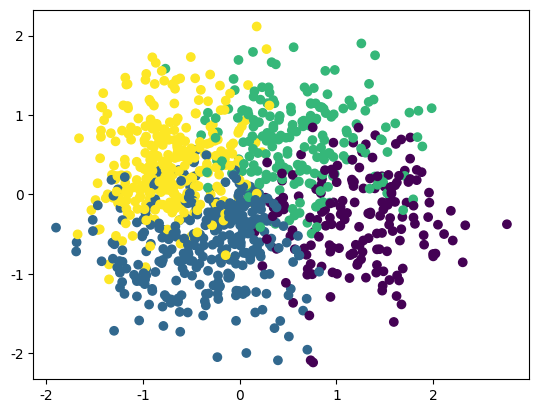

In [71]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)[1000:2000]  # 取前1000个词
word_vectors = model.wv[words]
kmeans = KMeans(n_clusters=4)
kmeans.fit(word_vectors)

# 可视化（简化展示）
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=kmeans.labels_)
plt.show()

